In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import *
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/travel insurance.csv',sep=',')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
df.shape

(63326, 11)

In [ ]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [ ]:
for i in df.columns:
  if(df[i].is_unique):
    df=df.drop(i,axis=1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
df.shape

(63326, 11)

In [ ]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [ ]:
for i in df.columns:
  print('length of '+str(i)+' =',len(df[i].unique()))

length of Agency = 16
length of Agency Type = 2
length of Distribution Channel = 2
length of Product Name = 26
length of Claim = 2
length of Duration = 455
length of Destination = 149
length of Net Sales = 1139
length of Commision (in value) = 1035
length of Gender = 3
length of Age = 89


In [ ]:
print('Categorical Columns are:')
cat_cols=[]
for i in df.columns:
  if((df.dtypes[i]=='object') | (len(df[i].unique())<16)):
    cat_cols.append(i)
print(cat_cols)

Categorical Columns are:
['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Gender']


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
cont_cols=[]
print('Continuous Columns are:')
for i in numeric_cols:
  if(len(df[i].unique())>16):
    cont_cols.append(i)
print(cont_cols)

Continuous Columns are:
['Duration', 'Net Sales', 'Commision (in value)', 'Age']


Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f408e9a3cc0>,
      dtype=object)

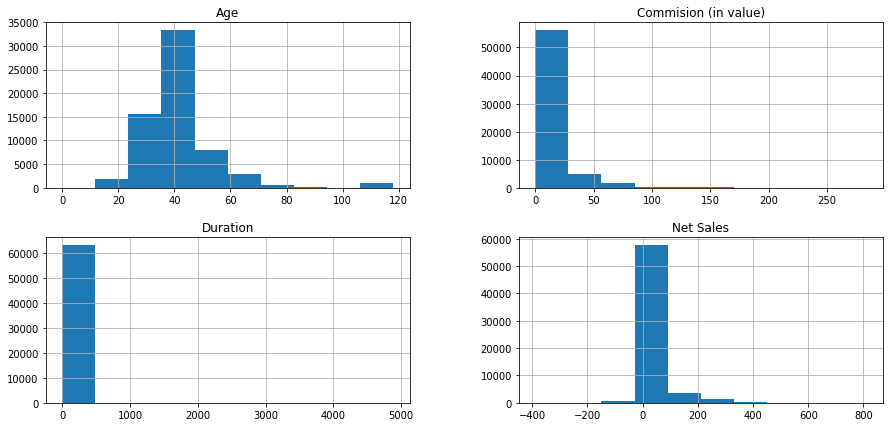

In [ ]:
df.hist(figsize=[15,7])
# Most of the cases o insurance are of the people of age between 35-45 i.e., abot half of the dataset.
# The commission retained as compensation by the agency in most of the cases lies between 0-25 and then increase instantly to 25-55.
# The duration of travel for all the cases lies between 1-400 days i.e, few days, few months or annual travel
# The net sales of the almost all agencies lies between 1-90, there can even be loss of 1-20, and in few cases the net sales increases to 90-210.

Text(0, 0.5, 'Number of Cases')

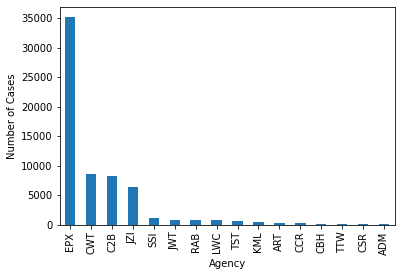

In [ ]:
a=df.Agency.value_counts().plot.bar()
a.set_xlabel('Agency')
a.set_ylabel('Number of Cases')
# EPX claims mostly 

Text(0, 0.5, 'Number of Cases')

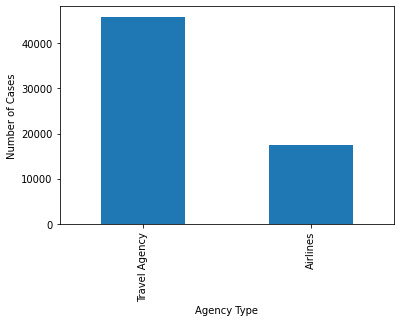

In [ ]:
a=df['Agency Type'].value_counts().plot.bar()
a.set_xlabel('Agency Type')
a.set_ylabel('Number of Cases')
# Travel agencies apply more claims i.e. 70%
# Airlines agencies apply less claims 

Text(0, 0.5, 'Number of Cases')

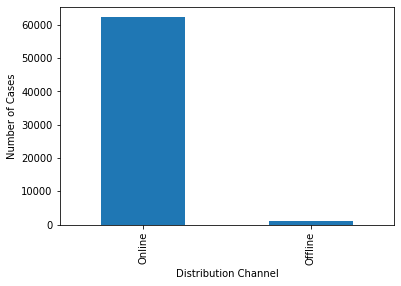

In [ ]:
a=df['Distribution Channel'].value_counts().plot.bar()
a.set_xlabel('Distribution Channel')
a.set_ylabel('Number of Cases')
# Almost all the cases except for very few have online distribution channel

Text(0, 0.5, 'Number of Cases')

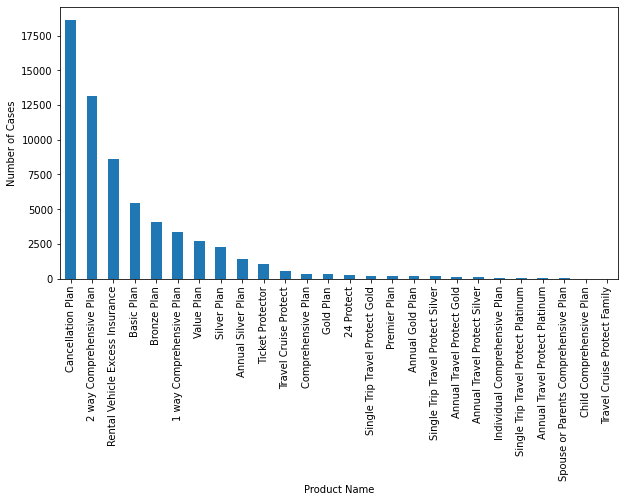

In [ ]:
a=df['Product Name'].value_counts().plot.bar(figsize=(10,5))
a.set_xlabel('Product Name')
a.set_ylabel('Number of Cases')
# Cancellation plans are the more frequently used plan which is understandable as if the trip got cancelled, they'll hope for the getting the refund.

Text(0, 0.5, 'Number of Cases')

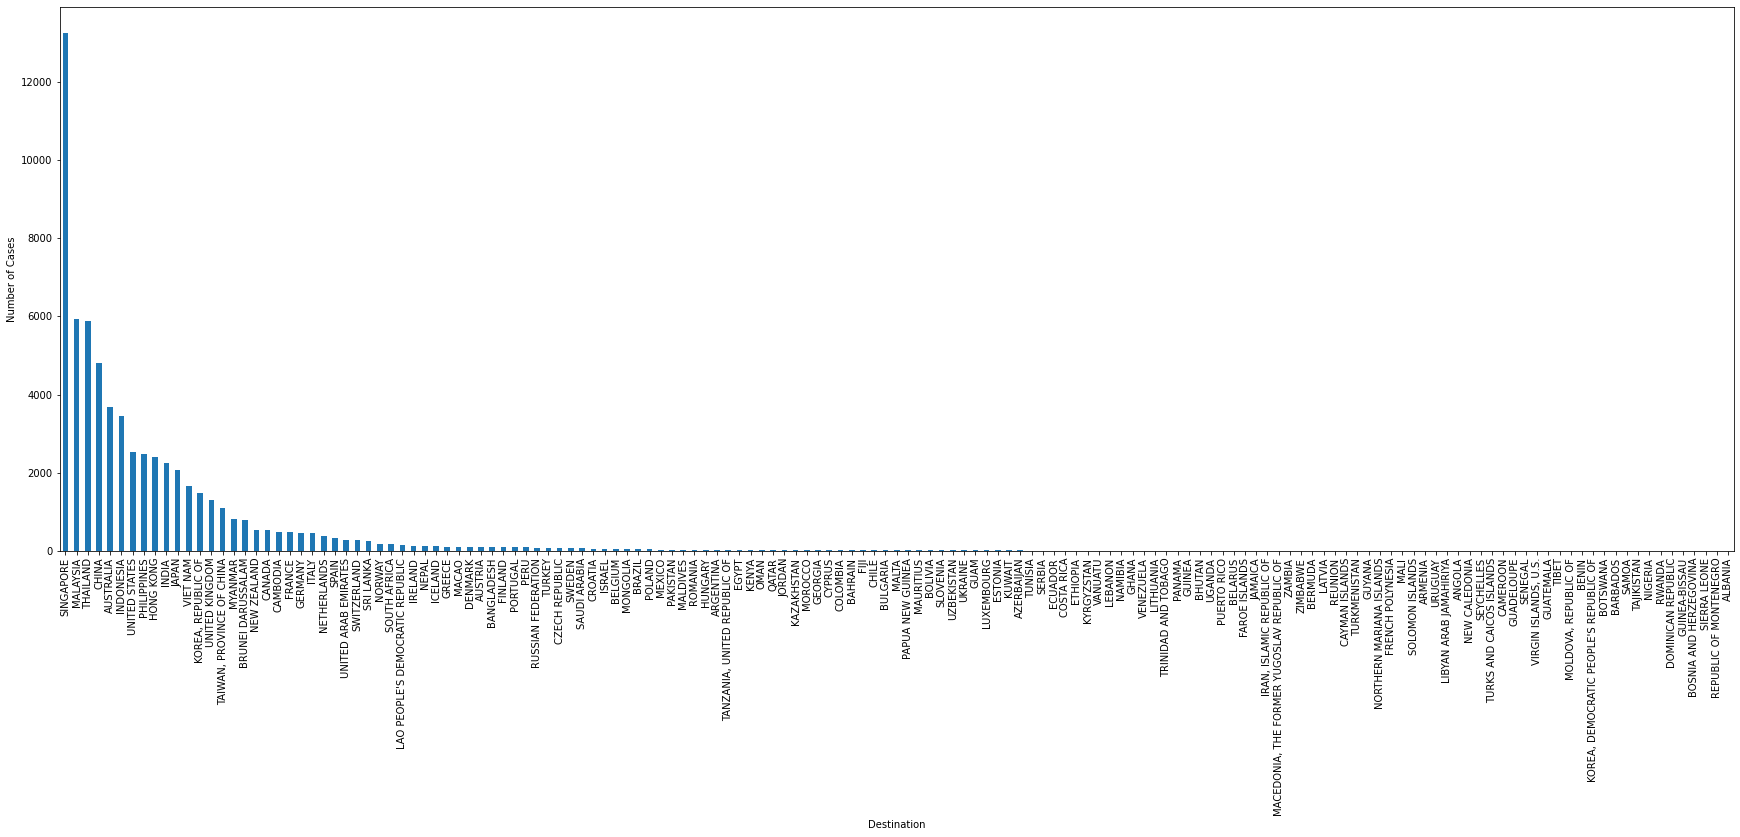

In [ ]:
a=df['Destination'].value_counts().plot.bar(figsize=(30,10))
a.set_xlabel('Destination')
a.set_ylabel('Number of Cases')
# The destination of many cases is Singapore, Malaysia, Thailand, China, US, Phillipines, Hong Kong, India, Japan i.e Asian countries except for US.
# Hence, We can say that people travelling to Asian Countries tends to claim more.    

Text(0, 0.5, 'Number of Cases')

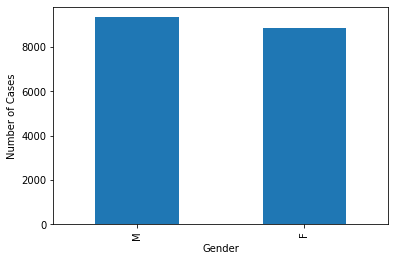

In [ ]:
a=df['Gender'].value_counts().plot.bar()
a.set_xlabel('Gender')
a.set_ylabel('Number of Cases')
# The ratio of male and females claiming for the insurance is almost same, with males slightly more than females.

Claim is a target variable, so there is no need to have an univariate analysis on Claim.

Bivariate Analysis

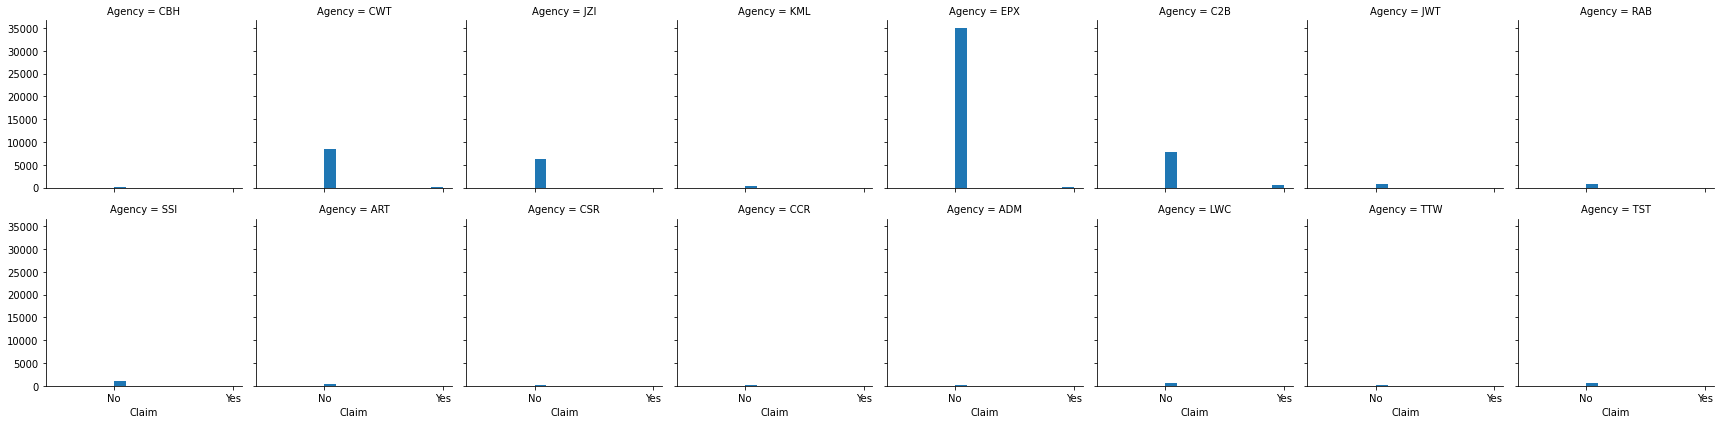

In [ ]:
h=sns.FacetGrid(df,col='Agency',col_wrap=8,height=3)
h=h.map(plt.hist,'Claim')
# Onlyfew cases of cwt and c2b agency's claims are accepted as Yes

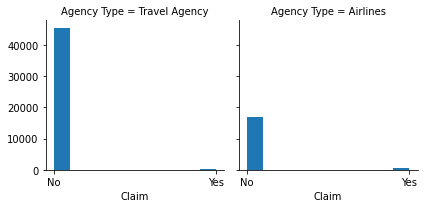

In [ ]:
h=sns.FacetGrid(df,col='Agency Type',height=3)
h=h.map(plt.hist,'Claim')
# Thought hte cases of Travel agency are of 705 of the total cases, still Airlines' Claims are accepted more as yes  

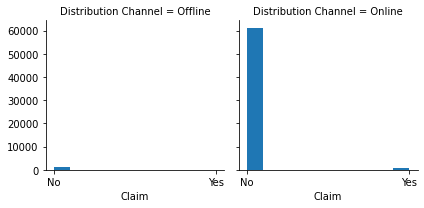

In [ ]:
h=sns.FacetGrid(df,col='Distribution Channel',height=3)
h=h.map(plt.hist,'Claim')
# For offline distribution channel there is no  claim approved
# For online distribution channel there are very few claims that are approved as Yes

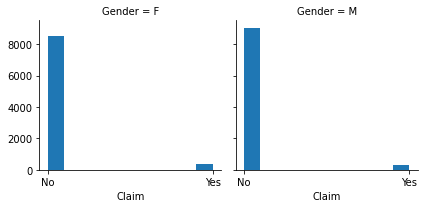

In [ ]:
h=sns.FacetGrid(df,col='Gender',height=3)
h=h.map(plt.hist,'Claim')
# Irrespective of the gender, the number of cases for the acceptance of a claim is almost same.

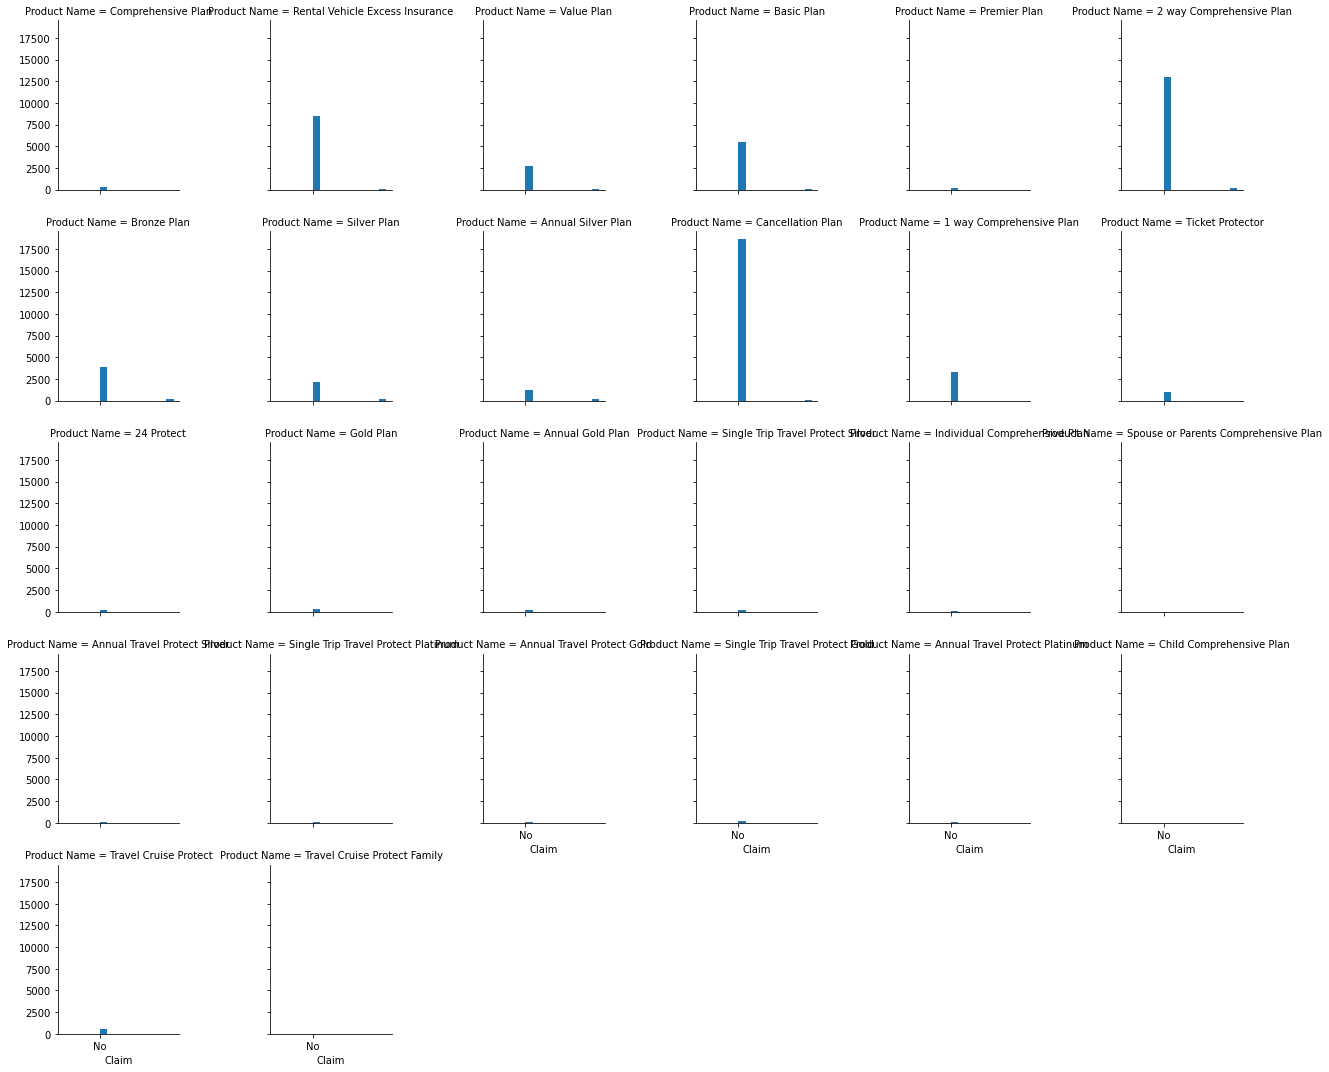

In [ ]:
h=sns.FacetGrid(df,col='Product Name',col_wrap=6,height=3)
h=h.map(plt.hist,'Claim')
# The caim got accepted only in the cases where product name are Rental Vehicle ExcessInsurance, Value Plan, Basic Plan,  2 way Comprehensive plan
# Bronze Plan, Siler Plan, Annual Silver Plan, Cancellation Plan,  though the probablility of acceptance is very very low.

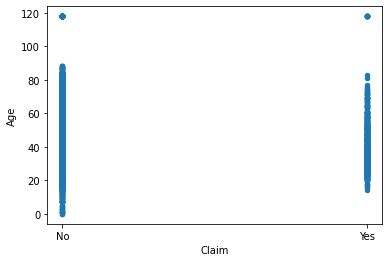

In [ ]:
df.plot.scatter(x='Claim',y='Age')
# People of age lying between 1-90 almost have both the acceptance and rejection of claims depending on other features also, but there are outlier in each case having the age 119

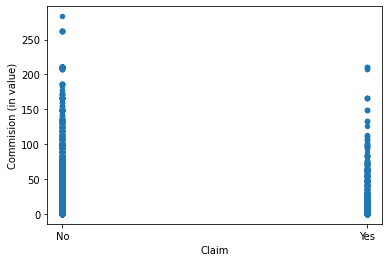

In [ ]:
df.plot.scatter(x='Claim',y='Commision (in value)')
# Claims could be accepted when the commission value is between 1-100 continuously and in some cases above that also

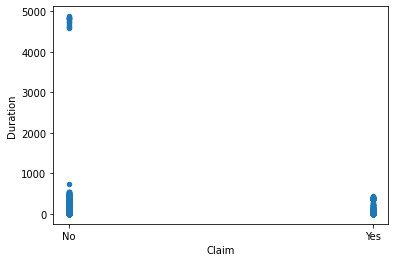

In [ ]:
df.plot.scatter(x='Claim',y='Duration')
# Duration of travel is between 1-400 then the claims seems to be accepted

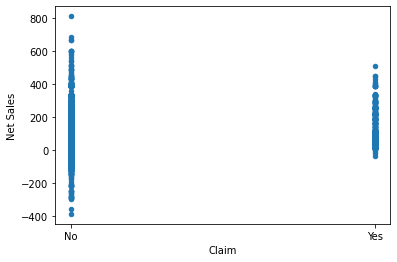

In [ ]:
df.plot.scatter(x='Claim',y='Net Sales')
# claims could be accepted when the net sales is between 0-400

Handling Outliers

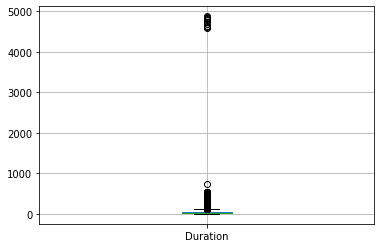

In [ ]:
df.boxplot(column=['Duration'])

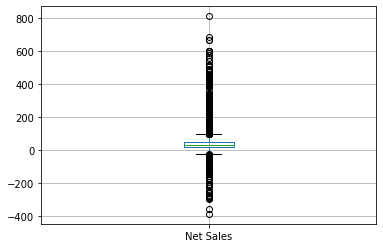

In [ ]:
df.boxplot(column=['Net Sales'])

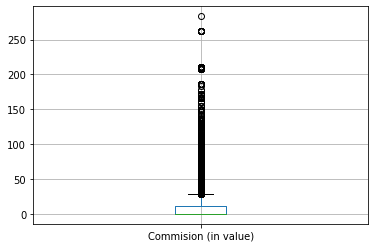

In [ ]:
df.boxplot(column=['Commision (in value)'])

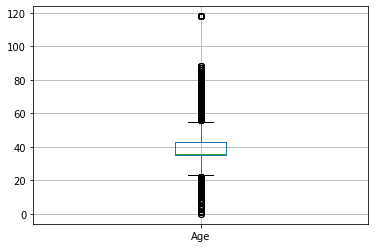

In [ ]:
df.boxplot(column=['Age'])

In [ ]:
m=df['Duration'].mean()
m

49.31707355588542

In [ ]:
df.loc[df['Duration'] <= 0, 'Duration'] = int(m)


In [ ]:
#Checking Skewness
for i in cont_cols:
  print(str(i)+' : '+str(df[i].skew()))

Duration : 23.186777057753453
Net Sales : 3.272372822599944
Commision (in value) : 4.032268514691959
Age : 2.987709841829195


In [ ]:
#Outlier handling by quantile capping and flooring at 10% and 90%
for i in cont_cols:
  lower=df[i].quantile(0.10)
  upper=df[i].quantile(0.90)
  df[i]=np.where(df[i]<lower,lower,df[i])
  df[i]=np.where(df[i]>upper,upper,df[i])
  print('After Handling outlier, skewness of '+str(i)+' is: ',str(df[i].skew()))

After Handling outlier, skewness of Duration is:  1.0814971444351904
After Handling outlier, skewness of Net Sales is:  0.8913342339002208
After Handling outlier, skewness of Commision (in value) is:  1.2859578179216349
After Handling outlier, skewness of Age is:  0.8091023430595911


Handling Missing Values

In [ ]:
#Number of Missing Values in each feature
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [ ]:
# Gender has more than 50% of the missing values. And also, it doesn't contribute much to the problem as despite the gender of the person, claims should be analysed.
# So, we can drop the Gender column from the dataset
df=df.drop(columns='Gender')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,109.0,MALAYSIA,10.0,9.57,55.0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,109.0,MALAYSIA,10.0,9.57,55.0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65.0,AUSTRALIA,10.0,29.70,32.0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60.0,AUSTRALIA,10.0,23.76,32.0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79.0,ITALY,10.0,11.88,41.0


In [ ]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

Deriving Correlation patterns of each independent varaible with the target/dependent variable(Claim)

In [ ]:
le=LabelEncoder()
target_df=pd.DataFrame()
target_df['Claim']=le.fit_transform(df['Claim'])
target_df.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [ ]:
df=df.drop(columns='Claim')
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')

In [ ]:
df_le=df.copy()
df_le.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,109.0,MALAYSIA,10.0,9.57,55.0
1,CBH,Travel Agency,Offline,Comprehensive Plan,109.0,MALAYSIA,10.0,9.57,55.0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65.0,AUSTRALIA,10.0,29.70,32.0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60.0,AUSTRALIA,10.0,23.76,32.0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79.0,ITALY,10.0,11.88,41.0


In [ ]:
# Label Encoding
cat_cols=list(set(cat_cols)-set(['Claim','Gender']))
cat_cols

['Distribution Channel',
 'Destination',
 'Agency',
 'Agency Type',
 'Product Name']

In [ ]:
#Label Encoding
for i in cat_cols:
  df_le['enc_'+str(i)]=le.fit_transform(df_le[i])
df_enc_le = df_le.drop(columns = cat_cols)
df_enc_le['enc_Claim']=target_df['Claim']
df_enc_le.head()

,Duration,Net Sales,Commision (in value),Age,enc_Distribution Channel,enc_Destination,enc_Agency,enc_Agency Type,enc_Product Name,enc_Claim
0,109.0,10.0,9.57,55.0,0,79,3,1,12,0
1,109.0,10.0,9.57,55.0,0,79,3,1,12,0
2,65.0,10.0,29.70,32.0,1,4,6,1,16,0
3,60.0,10.0,23.76,32.0,1,4,6,1,16,0
4,79.0,10.0,11.88,41.0,1,61,6,1,16,0


In [ ]:
corr = df_enc_le.corr()
corr.head()

,Duration,Net Sales,Commision (in value),Age,enc_Distribution Channel,enc_Destination,enc_Agency,enc_Agency Type,enc_Product Name,enc_Claim
Duration,1.000000,0.298933,0.204503,-0.004357,-0.060032,0.030907,-0.025575,-0.015504,-0.038351,0.056551
Net Sales,0.298933,1.000000,0.451170,0.025666,-0.003907,-0.016833,-0.182935,-0.044301,-0.009938,0.094824
Commision (in value),0.204503,0.451170,1.000000,0.176251,-0.024748,-0.058917,-0.222255,-0.300560,0.494778,0.093157
Age,-0.004357,0.025666,0.176251,1.000000,-0.131616,-0.008187,0.161239,-0.190737,0.213959,-0.014561
enc_Distribution Channel,-0.060032,-0.003907,-0.024748,-0.131616,1.000000,-0.052289,-0.191928,-0.076895,-0.155318,-0.000798


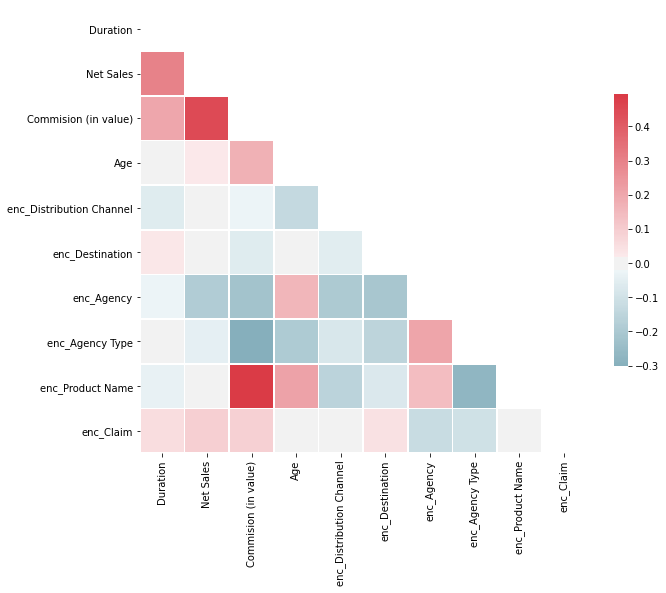

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

Using target variable- Claim, identifying class imbalance

In [ ]:
print(target_df['Claim'].value_counts())
lbl_1,lbl_0 = target_df['Claim'].value_counts()
print("Label No class %age: "+str((lbl_1*100)/target_df['Claim'].count()))
print("Label Yes class %age: "+str((lbl_0*100)/target_df['Claim'].count()))

0    62399
1      927
Name: Claim, dtype: int64
Label No class %age: 98.53614629062312
Label Yes class %age: 1.4638537093768753
